In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_excel('/content/electronics_retail_sales_Data.xlsx')
df

,Order_ID,Order_Date,Product,Category,Region,Quantity,Unit_Price,Revenue
0,5001,2024-01-01,Power Bank,Accessories,East,8,238764,1910112
1,5002,2024-01-02,Laptop,Accessories,South,10,304454,3044540
2,5003,2024-01-03,Smart Watch,Accessories,West,11,19587,215457
3,5004,2024-01-04,Smart TV,Accessories,West,9,236960,2132640
4,5005,2024-01-05,Smart TV,Electronics,North,7,235565,1648955
...,...,...,...,...,...,...,...,...
195,5196,2024-07-14,Tablet,Electronics,East,16,234541,3752656
196,5197,2024-07-15,Smart TV,Electronics,North,9,57845,520605
197,5198,2024-07-16,Tablet,Accessories,North,5,102198,510990
198,5199,2024-07-17,Smartphone,Electronics,East,9,278241,2504169


Converting the order date into a standardized date format

In [6]:
df['Year_Month'] = df['Order_Date'].dt.strftime('%Y-%B')


In [7]:
df['Year_Month']

,Year_Month
0,2024-January
1,2024-January
2,2024-January
3,2024-January
4,2024-January
...,...
195,2024-July
196,2024-July
197,2024-July
198,2024-July


What product generates the highest Revenue?

In [8]:
Revenue=df.groupby('Product')['Revenue'].sum().reset_index()
Revenue


,Product,Revenue
0,Headphones,45237784
1,Laptop,53993458
2,Power Bank,80422561
3,Smart TV,78553554
4,Smart Watch,55326858
5,Smartphone,41669443
6,Tablet,78042593


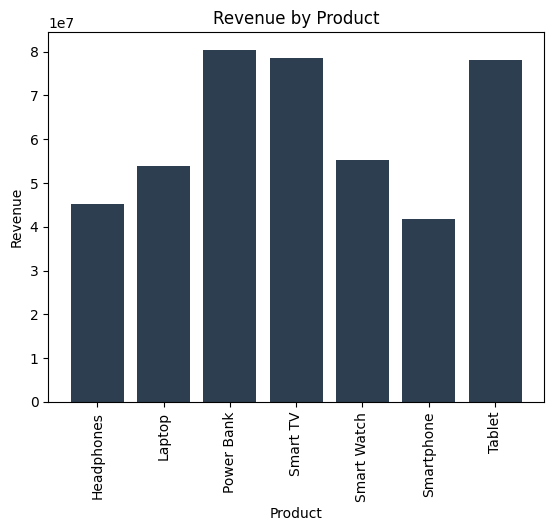

In [9]:
plt.figure()
plt.bar(Revenue['Product'],Revenue['Revenue'],color='#2c3e50')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

In [10]:
Revenue.loc[Revenue['Revenue'].idxmax()]


,2
Product,Power Bank
Revenue,80422561


In [11]:
Revenue.loc[Revenue['Revenue'].idxmin()]


,5
Product,Smartphone
Revenue,41669443


The product with the highest generated Revenue is POWER BANK with a Revenue of 80422561 while the project with the least generated Revenue is SMARTPHONE with 41669443 Naira

How does Monthly sales change over time?

In [12]:
Monthly_sales=df.groupby(['Year_Month','Product'])['Quantity'].sum().reset_index()
Monthly_sales

,Year_Month,Product,Quantity
0,2024-April,Headphones,15
1,2024-April,Laptop,27
2,2024-April,Power Bank,53
3,2024-April,Smart TV,53
4,2024-April,Smart Watch,37
5,2024-April,Smartphone,40
6,2024-April,Tablet,69
7,2024-February,Headphones,16
8,2024-February,Laptop,44
9,2024-February,Power Bank,53


In [13]:
Monthly_sales['Year_Month'] = pd.to_datetime(Monthly_sales['Year_Month'])


/tmp/ipython-input-2285139651.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Monthly_sales['Year_Month'] = pd.to_datetime(Monthly_sales['Year_Month'])


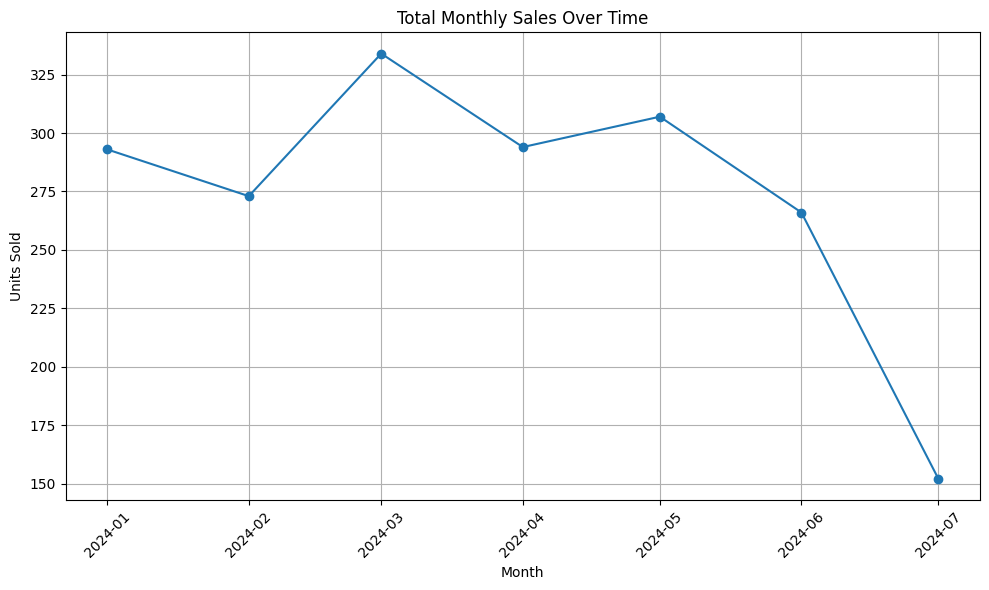

In [14]:
monthly_total = Monthly_sales.groupby('Year_Month')['Quantity'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(monthly_total['Year_Month'], monthly_total['Quantity'], marker='o')
plt.title('Total Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Which Region performs best?

In [15]:
Regions=df.groupby('Region')['Revenue'].sum().reset_index()
Regions

,Region,Revenue
0,East,108827634
1,North,117424363
2,South,118747666
3,West,88246588


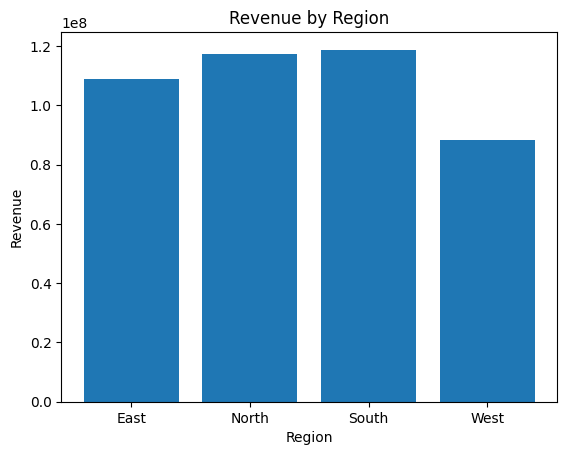

In [16]:
plt.figure()
plt.bar(Regions['Region'],Regions['Revenue'])
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()

In [17]:
Regions.loc[Regions['Revenue'].idxmax()]

,2
Region,South
Revenue,118747666


The Region that Performed Best is the SOUTH with 118747666 generated from Revenue while the WEST had the least recorded performance with 88246588 generated from Revenue.

Are accessories more profitable than Electronics?

In [18]:
Performance=df.groupby(['Product','Category'])[['Revenue','Quantity']].sum().reset_index()
Performance

,Product,Category,Revenue,Quantity
0,Headphones,Accessories,18549187,56
1,Headphones,Electronics,26688597,116
2,Laptop,Accessories,31396454,151
3,Laptop,Electronics,22597004,137
4,Power Bank,Accessories,40036468,169
5,Power Bank,Electronics,40386093,192
6,Smart TV,Accessories,39070886,130
7,Smart TV,Electronics,39482668,173
8,Smart Watch,Accessories,32557365,139
9,Smart Watch,Electronics,22769493,130


ACCESSORIES sold a total of 930 Units while ELECTRONICS sold a total of 989 units

In [20]:
Revenue.to_excel('revenue_by_product.xlsx', index=False)
Regions.to_excel('revenue_by_region.xlsx', index=False)
Performance.to_excel('product_performance.xlsx', index=False)


In [21]:
df.to_excel('clean_electronics_sales_data.xlsx', index=False)
